In [2]:
import pandas as pd

In [11]:
data = pd.read_csv('C:\\Users\\goyle\\Downloads\\Section-1-and-3-data\\Section 1 data.csv', encoding='utf-8')


In [12]:
data

,Review_Date,Review_Text,User_ID,Business_ID,Business_Name,Business_Category,City,State,Latitude,Longitude,Avg_Business_Star_Rating
0,2014-07-16,okay...so so,6VxJJX7h36bMCCFt7URg6w,9QqLqYIwV-n1BJPjnaYv8A,Beef 'O' Brady's,Bars,Chandler,AZ,33.303847,-111.946838,3.5
1,2014-07-16,Some people complain about the prices but Subw...,viGPiPuMZnV4PR_aiA3-qw,pNQwnY_q4okdlnPiR-3RBA,Empire Bagels,Food,Las Vegas,NV,36.077299,-115.297979,3.5
2,2014-07-16,"Had red curry chicken, the chicken itself was ...",rwehMCinfBjhZ0IbR1zFBw,shCdCHRbnY5FTMJbWl-myQ,Thai Spices,Thai,Mesa,AZ,33.412708,-111.875803,4.0
3,2014-07-16,"Alright, I gave the restaurant manager ample t...",VWqt5IH8fm-k9M0CKFkJzg,HpaYCM_NCauI72LLXxC6SA,Yonaka Modern Japanese,Tapas/Small Plates,Las Vegas,NV,36.114935,-115.209737,4.5
4,2014-07-16,Blehhhh :/ this place shouldn't even be in bus...,Y6-0ToMhjBsm8iYEaT2meg,FC4q3hJyF8oo984xoo3RMg,808 Sushi,Sushi Bars,Las Vegas,NV,36.052181,-115.279227,3.5
...,...,...,...,...,...,...,...,...,...,...,...
227576,2005-03-08,"It's not the Four Seasons, but more appropriat...",K4FAia2Iy5MVnmBLfS-mCg,WnY4HPJIYNXOPQH2mFzl2Q,THEhotel at Mandalay Bay,Hotels & Travel,Las Vegas,NV,36.092988,-115.177838,4.0
227577,2005-03-03,There is nothing better than happy hour on the...,G8Q9rASB6YI2ICBkkpwvcw,RgBq9TFI8q6-vCvF6wOMVg,Genna's Lounge,Bars,Madison,WI,43.072720,-89.384389,4.0
227578,2005-03-03,Easily my favorite place to eat in Madison. G...,8ITVDdfK07owxCA1x878Vw,3nwskbfFgsSjVe6T8keTeg,Lao Laan-Xang Restaurant,Thai,Madison,WI,43.083166,-89.364985,4.0
227579,2005-03-01,"Spacious, luxurious rooms that definitely meri...",WPOKvkacSKHx_bIG1alFiA,-7yF42k0CcJhtPw51oaOqQ,Bellagio,Hotels & Travel,Las Vegas,NV,36.112024,-115.174593,4.0


In [13]:
unique_restaurants = data['Business_ID'].nunique()
print(f"Number of unique restaurants: {unique_restaurants}")

Number of unique restaurants: 30276


In [14]:

reviews_per_restaurant = data.groupby('Business_ID').size().reset_index(name='Review_Count')


max_reviews_restaurant = reviews_per_restaurant.loc[reviews_per_restaurant['Review_Count'].idxmax()]
print(f"Restaurant with the highest number of reviews: {max_reviews_restaurant['Business_ID']}")


total_reviews = data.shape[0]
max_reviews_percentage = (max_reviews_restaurant['Review_Count'] / total_reviews) * 100
print(f"Percentage-wise reviews: {max_reviews_percentage:.2f}%")


Restaurant with the highest number of reviews: 4bEjOyTaDG24SY5TxsaUNQ
Percentage-wise reviews: 0.38%


In [17]:
# Filter data for NV state and 5-star reviews
nv_5_star_reviews = data[(data['State'] == 'NV') & (data['Avg_Business_Star_Rating'] == 5)]

# Get the cities with at least one 5-star review
cities_with_5_star_nv = nv_5_star_reviews['City'].unique()
print(f"Cities in Nevada with at least one 5-star review: {cities_with_5_star_nv}")


Cities in Nevada with at least one 5-star review: ['Las Vegas' 'Henderson' 'Boulder City' 'Nellis']


In [18]:
# Filter data for the "Hotels & Travel" category
hotels_travel_data = data[data['Business_Category'] == 'Hotels & Travel']

# Group by city and count the number of reviews
reviews_per_city_hotels = hotels_travel_data.groupby('City').size().reset_index(name='Review_Count')

# City with the highest number of reviews
max_reviews_city = reviews_per_city_hotels.loc[reviews_per_city_hotels['Review_Count'].idxmax()]
print(f"City with the highest number of reviews in 'Hotels & Travel': {max_reviews_city['City']}")

# Percentage-wise review count
total_reviews_hotels = hotels_travel_data.shape[0]
max_reviews_city_percentage = (max_reviews_city['Review_Count'] / total_reviews_hotels) * 100
print(f"Percentage-wise reviews: {max_reviews_city_percentage:.2f}%")


City with the highest number of reviews in 'Hotels & Travel': Las Vegas
Percentage-wise reviews: 77.64%


In [23]:
# Convert the 'Date' column to datetime if it's not already
data['Review_Date'] = pd.to_datetime(data['Review_Date'])

# Extract the day of the week
data['Day_of_Week'] = data['Review_Date'].dt.day_name()

# Count reviews for each day of the week
reviews_per_day = data['Day_of_Week'].value_counts()
print(f"Reviews per day of the week: {reviews_per_day}")


Reviews per day of the week: Day_of_Week
Monday       36446
Tuesday      34262
Wednesday    34170
Sunday       32889
Thursday     30669
Friday       29574
Saturday     29571
Name: count, dtype: int64


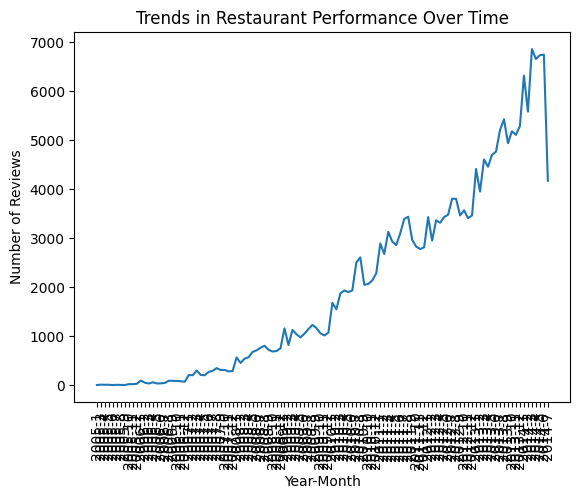

In [24]:
# Group by year and month to observe trends over time
data['Year'] = data['Review_Date'].dt.year
data['Month'] = data['Review_Date'].dt.month
monthly_trends = data.groupby(['Year', 'Month']).size().reset_index(name='Review_Count')

# Plotting the trends
import matplotlib.pyplot as plt

plt.plot(monthly_trends['Year'].astype(str) + '-' + monthly_trends['Month'].astype(str), monthly_trends['Review_Count'])
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.title('Trends in Restaurant Performance Over Time')
plt.xticks(rotation=90)
plt.show()
